In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import math
from scipy import stats

sb.set() # set the default Seaborn style for graphics

# Initial Exploratory Data Analysis
Taking a look at our data parameters and what we can do with it to tackle our problems

In [2]:
twitchdata = pd.read_csv('test_data2.csv')
twitchdata.describe()

,id,user_id,game_id,viewer_count,follow_count,total_views
count,2.249800e+04,2.249800e+04,2.217000e+04,22498.000000,2.249800e+04,2.249800e+04
mean,4.457011e+10,2.778053e+08,9.916903e+07,399.233621,5.675228e+04,3.119751e+06
std,2.250975e+09,2.341796e+08,3.614630e+08,3887.617151,4.202539e+05,2.289098e+07
min,3.926852e+10,1.040600e+04,2.070000e+02,8.000000,0.000000e+00,0.000000e+00
25%,4.514331e+10,8.689367e+07,3.298200e+04,24.000000,1.282000e+03,2.396100e+04
50%,4.516681e+10,1.711871e+08,4.970570e+05,42.000000,4.369500e+03,1.023455e+05
75%,4.607995e+10,4.864919e+08,5.127090e+05,104.000000,1.700075e+04,5.201175e+05
max,4.610372e+10,7.862522e+08,2.143824e+09,272883.000000,1.753082e+07,7.602435e+08


In [3]:
twitchdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22498 entries, 0 to 22497
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             22498 non-null  int64  
 1   user_id        22498 non-null  int64  
 2   user_login     22498 non-null  object 
 3   user_name      22498 non-null  object 
 4   game_id        22170 non-null  float64
 5   game_name      22195 non-null  object 
 6   type           22498 non-null  object 
 7   title          22375 non-null  object 
 8   viewer_count   22498 non-null  int64  
 9   started_at     22498 non-null  object 
 10  language       22498 non-null  object 
 11  thumbnail_url  22498 non-null  object 
 12  tag_ids        22491 non-null  object 
 13  is_mature      22498 non-null  bool   
 14  follow_count   22498 non-null  int64  
 15  total_views    22498 non-null  int64  
dtypes: bool(1), float64(1), int64(5), object(9)
memory usage: 2.6+ MB


In [4]:
twitchdata.head()

,id,user_id,user_login,user_name,game_id,game_name,type,title,viewer_count,started_at,language,thumbnail_url,tag_ids,is_mature,follow_count,total_views
0,45141548204,27115917,kamet0,Kamet0,509658.0,Just Chatting,live,REDDIT WAR | ON FAIT LA GUERRE SUR LE R/PLACE ...,272883,2022-04-04T10:20:45Z,fr,https://static-cdn.jtvnw.net/previews-ttv/live...,['6f655045-9989-4ef7-8f85-1edcec42d648'],False,1230588,102061711
1,46069421021,83232866,ibai,ibai,509658.0,Just Chatting,live,GUERRA EN REDDIT | ÚLTIMO DÍA | HOY SE DECIDE ...,251355,2022-04-04T13:41:21Z,es,https://static-cdn.jtvnw.net/previews-ttv/live...,['d4bb9c58-2141-4881-bcdc-3fe0505457d1'],False,9770181,350406048
2,46069834125,459331509,auronplay,auronplay,509658.0,Just Chatting,live,GUERRA EN REDDIT? Y POR QUÉ NO NOS BESAMOS? NO...,165692,2022-04-04T14:47:47Z,es,https://static-cdn.jtvnw.net/previews-ttv/live...,['d4bb9c58-2141-4881-bcdc-3fe0505457d1'],False,12255320,256207080
3,45142671692,622498423,otplol_,otplol_,21779.0,League of Legends,live,EUM PLAY-IN - KCORP / VIT EN DUPLEX - JOUR 1 -...,89981,2022-04-04T14:30:12Z,fr,https://static-cdn.jtvnw.net/previews-ttv/live...,"['6f655045-9989-4ef7-8f85-1edcec42d648', '36a8...",False,505006,96518958
4,46069561085,39426641,evelone192,Evelone192,509658.0,Just Chatting,live,Pixel battle Freak,42746,2022-04-04T14:03:28Z,ru,https://static-cdn.jtvnw.net/previews-ttv/live...,['0569b171-2a2b-476e-a596-5bdfb45a1327'],False,2085936,98111163


<Figure size 1728x1728 with 0 Axes>

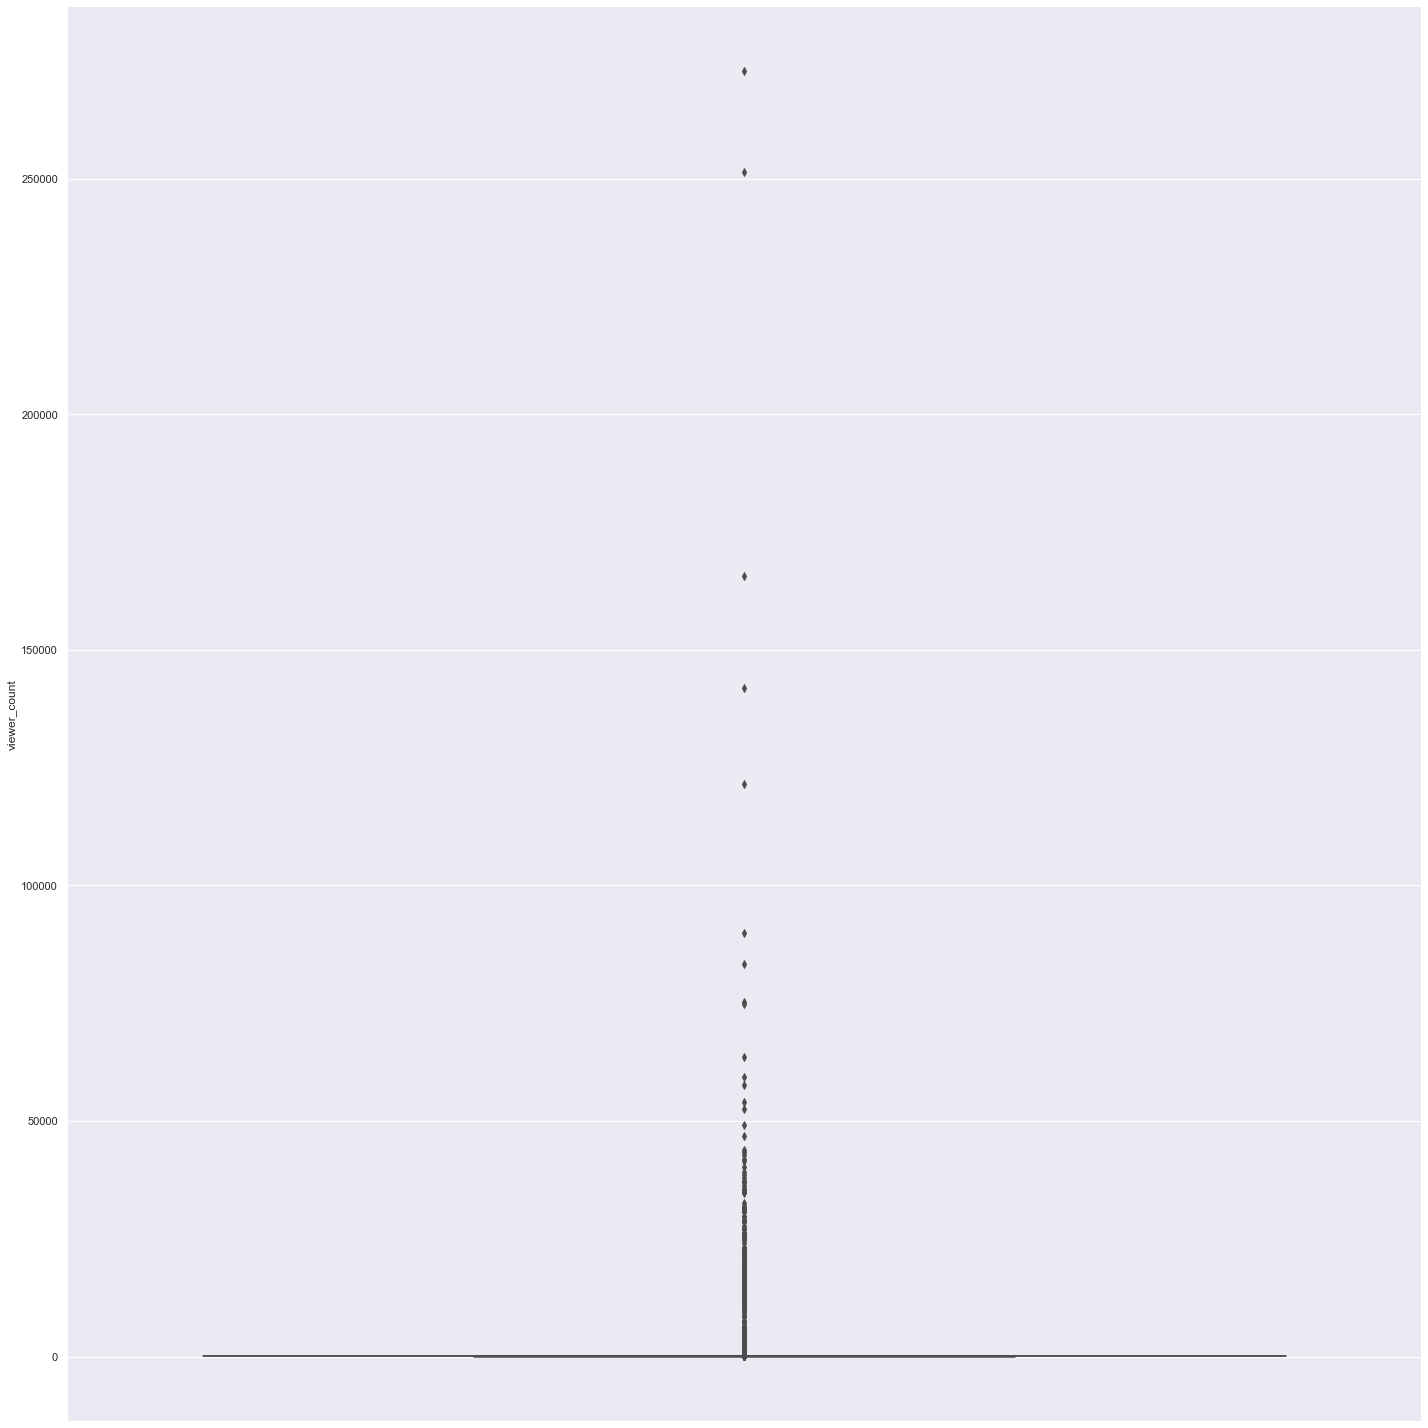

In [5]:
f = plt.figure(figsize=(24, 24))
sb.catplot(y = 'viewer_count', data = twitchdata, height = 20, kind = 'box')

From this boxplot, we can tell that 75% of the data lies around the 0 number, thus there is a need to clean outliers.

# Basic exploration of Catogerical Predictors

In [43]:
# Categorical Predictors are 'game_name','language','is_mature'
twitchdata[['game_name','language','is_mature']].describe()

,game_name,language,is_mature
count,22195,22498,22498
unique,1401,33,2
top,Just Chatting,en,False
freq,2411,10882,13995


False    13995
True      8503
Name: is_mature, dtype: int64


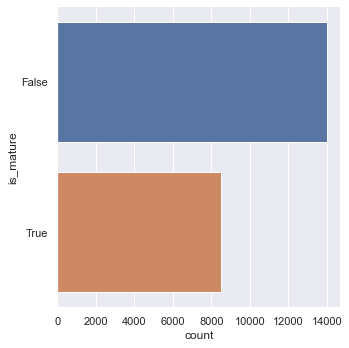

In [44]:
# Is_mature categorical data
print(twitchdata["is_mature"].value_counts())
sb.catplot(y = "is_mature", data = twitchdata, kind = "count")

# Start plotting with our numeric predictors

We start by looking to see the relationship between active viewer count (viewer_count) and total views of the channels (total_views) as well as the follow count of the channels (follow_count)

In [6]:
# Numeric Predictors are 'total_views','follow_count'
twitchdata[['total_views','follow_count']].describe()

,total_views,follow_count
count,2.249800e+04,2.249800e+04
mean,3.119751e+06,5.675228e+04
std,2.289098e+07,4.202539e+05
min,0.000000e+00,0.000000e+00
25%,2.396100e+04,1.282000e+03
50%,1.023455e+05,4.369500e+03
75%,5.201175e+05,1.700075e+04
max,7.602435e+08,1.753082e+07


<AxesSubplot:>

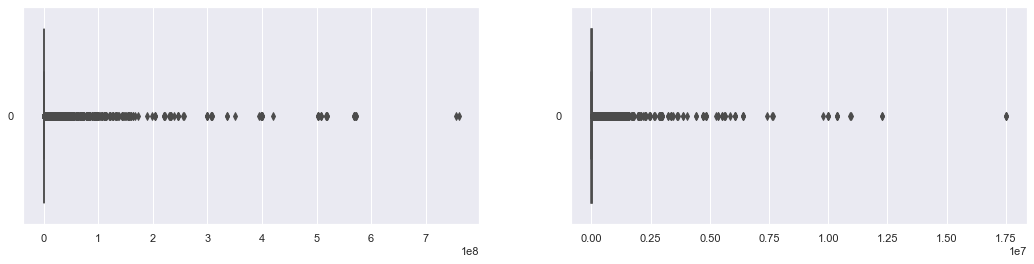

In [7]:
# Numeric Predictors plots
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = twitchdata['total_views'], orient = "h", ax = axes[0])
sb.boxplot(data = twitchdata['follow_count'], orient = 'h', ax = axes[1])

<AxesSubplot:xlabel='follow_count', ylabel='viewer_count'>

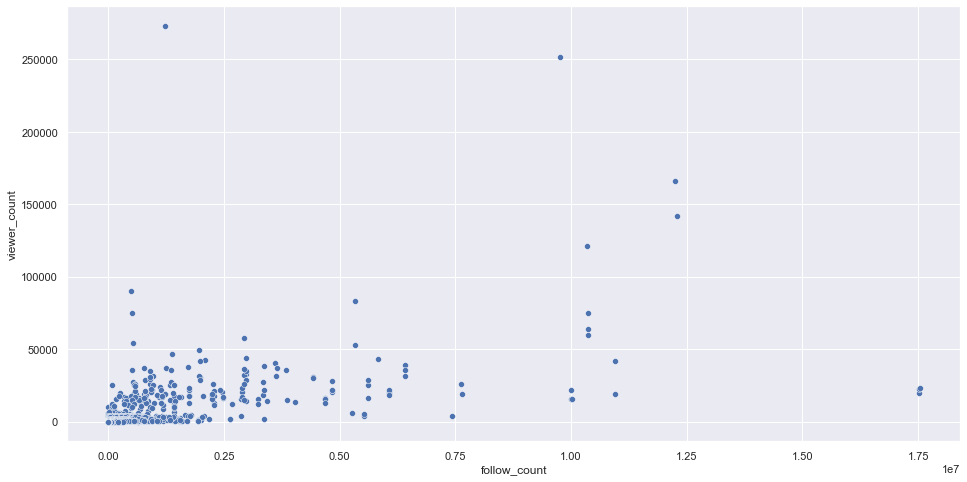

In [8]:
# Follow count vs Active Viewer Count
f = plt.figure(figsize = (16,8))
sb.scatterplot(x = 'follow_count', y = 'viewer_count', data = twitchdata)

<AxesSubplot:xlabel='total_views', ylabel='viewer_count'>

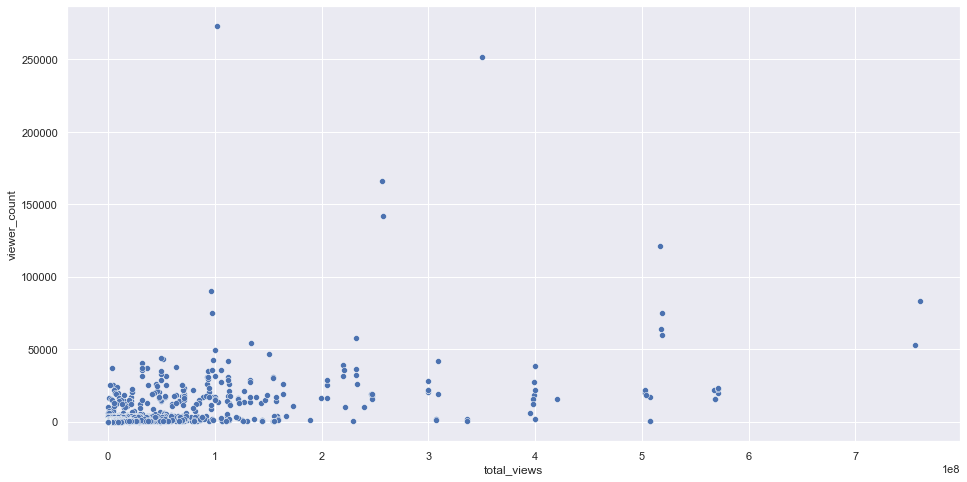

In [9]:
f = plt.figure(figsize = (16,8))
sb.scatterplot(x = 'total_views', y = 'viewer_count', data = twitchdata)

From the scatterplots above, we can see that the majority of the data scrapped is congregated at the bottom left of the graph. This means that we need to clean the data in order to get meaningful insights


# Correlation
Looking at the correlation matrix before we clean the data for numeric predictors, we see that the correlation between viewer_count and follow + total views is alright

              viewer_count  follow_count  total_views
viewer_count      1.000000      0.591279     0.518855
follow_count      0.591279      1.000000     0.793644
total_views       0.518855      0.793644     1.000000


<AxesSubplot:>

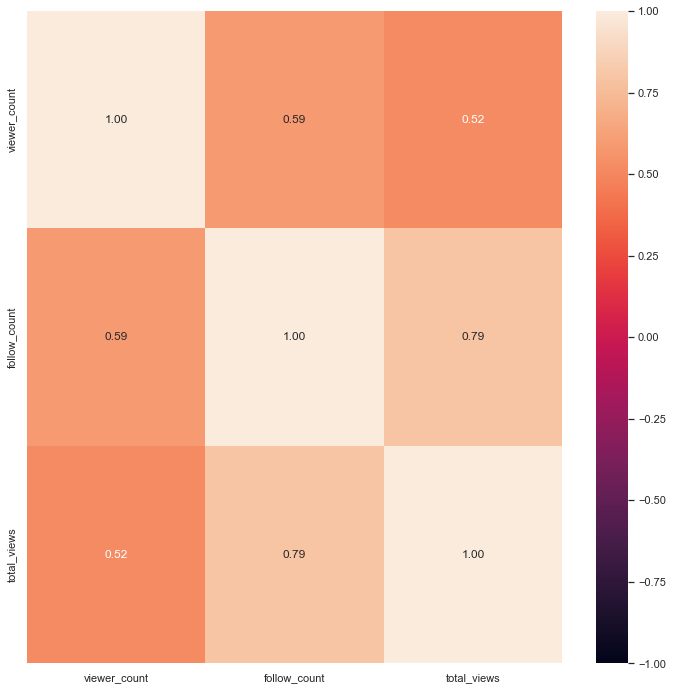

In [10]:
twitch_num = pd.DataFrame(twitchdata[['viewer_count', 'follow_count', 'total_views']])
print(twitch_num.corr())

# Heatmap of numeric correlation
f = plt.figure(figsize=(12, 12))
sb.heatmap(twitch_num.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

# Cleaning the data of outliers
In order to gain more insightful observations, we will attempt to get rid of the outliers using the IQR method

### First we need to fill up the columns as some of them are not filled up properly

In [11]:
twitchdata_clean = twitchdata.copy()
twitchdata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22498 entries, 0 to 22497
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             22498 non-null  int64  
 1   user_id        22498 non-null  int64  
 2   user_login     22498 non-null  object 
 3   user_name      22498 non-null  object 
 4   game_id        22170 non-null  float64
 5   game_name      22195 non-null  object 
 6   type           22498 non-null  object 
 7   title          22375 non-null  object 
 8   viewer_count   22498 non-null  int64  
 9   started_at     22498 non-null  object 
 10  language       22498 non-null  object 
 11  thumbnail_url  22498 non-null  object 
 12  tag_ids        22491 non-null  object 
 13  is_mature      22498 non-null  bool   
 14  follow_count   22498 non-null  int64  
 15  total_views    22498 non-null  int64  
dtypes: bool(1), float64(1), int64(5), object(9)
memory usage: 2.6+ MB


### Because there are some data points whose columns are not filled properly, we need to fill it properly in order to do analysis properly

In [12]:
twitchdata_clean['game_id'].fillna(value = '0', inplace = True)
twitchdata_clean['game_name'].fillna(value = 'Invalid', inplace = True)
twitchdata_clean['title'].fillna(value = "No Title", inplace = True)
twitchdata_clean['tag_ids'].fillna(value = 'No Tags', inplace = True)

In [13]:
twitchdata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22498 entries, 0 to 22497
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             22498 non-null  int64 
 1   user_id        22498 non-null  int64 
 2   user_login     22498 non-null  object
 3   user_name      22498 non-null  object
 4   game_id        22498 non-null  object
 5   game_name      22498 non-null  object
 6   type           22498 non-null  object
 7   title          22498 non-null  object
 8   viewer_count   22498 non-null  int64 
 9   started_at     22498 non-null  object
 10  language       22498 non-null  object
 11  thumbnail_url  22498 non-null  object
 12  tag_ids        22498 non-null  object
 13  is_mature      22498 non-null  bool  
 14  follow_count   22498 non-null  int64 
 15  total_views    22498 non-null  int64 
dtypes: bool(1), int64(5), object(10)
memory usage: 2.6+ MB


In [14]:
# Import Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def univariateLinearRegression(Xvar = None, yvar = None, df = None):
    '''
        Function to perform Linear Regression with Xvar and yvar in df.
        Prints the required plots within the function. Returns nothing.
    '''    
    
    # Extract Response and Predictors
    y = pd.DataFrame(df[yvar])
    X = pd.DataFrame(df[Xvar])

    # Split the Dataset into random Train and Test (80:20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Print the coefficients of the Regression Line
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    
    # Formula for the Regression line
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train
    
    # Predict Response corresponding to Predictors
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(X_train, y_train, color = "blue")
    axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)
    axes[0].set_title("Regression Line on Train Set")
    axes[1].scatter(X_test, y_test, color = "green")
    axes[1].scatter(X_test, y_test_pred, color = "red")
    axes[1].set_title("Model Prediction on Test Set")
    plt.show()
    
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Prediction Accuracy of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

#### Before cleaning the data, lets see the linear regression when it still has outliers

Intercept 	: b =  [99.2]
Coefficients 	: a =  [[0.01]]


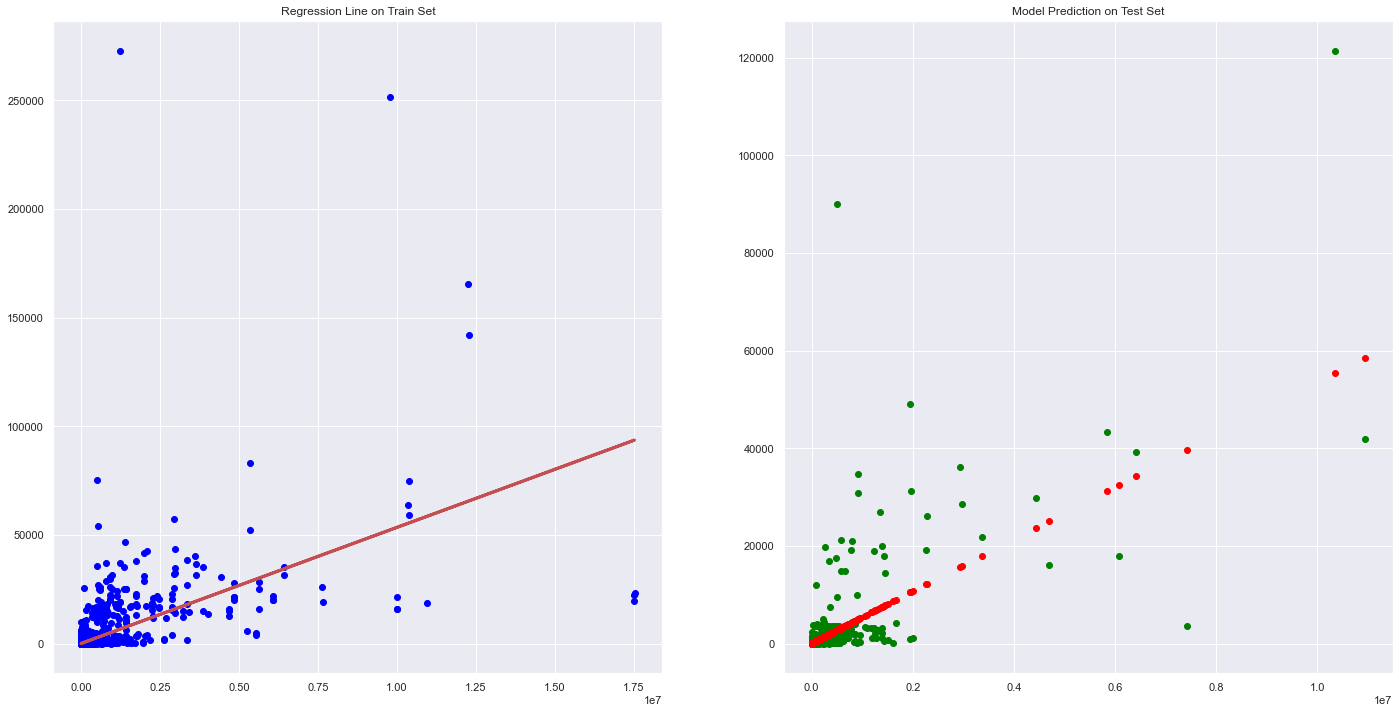

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3289234274563797
Mean Squared Error (MSE) 	: 11033160.954840729

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4867908394833459
Mean Squared Error (MSE) 	: 5029467.374948571



In [63]:
#Logarithmic Test
#twitchdata_clean['log(follow_count)'] = round(np.log10(twitchdata_clean[['follow_count']]),2)
#twitchdata_clean['log(follow_count)'] = twitchdata_clean['log(follow_count)'].replace(np.nan, 0)
#twitchdata_clean['log(follow_count)'] = twitchdata_clean['log(follow_count)'].replace(np.inf, 0)
#twitchdata_clean['log(follow_count)'] = twitchdata_clean['log(follow_count)'].replace(-np.inf, 0)

univariateLinearRegression(Xvar = 'follow_count', yvar = "viewer_count", df = twitchdata_clean)

### Now we will attempt to clean outliers between viewer_count and follow_count to try linear regression

In [16]:
targetData = twitchdata_clean[['viewer_count', 'follow_count']].copy()

In [17]:
# Calculate the quartiles
Q1 = targetData.quantile(0.25)
Q3 = targetData.quantile(0.75)

# Rule to identify outliers
rule = ((targetData < (Q1 - 1.5 * (Q3 - Q1))) | (targetData > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

viewer_count    3002
follow_count    3237
dtype: int64

In [18]:
# Calculate the quartiles
Q1 = targetData.quantile(0.25)
Q3 = targetData.quantile(0.75)

# Rule toaidentify outliers
rule = ((targetData < (Q1 - 1.5 * (Q3 - Q1))) | (targetData > (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule

,viewer_count,follow_count
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
22493,False,False
22494,False,False
22495,False,False
22496,False,False


In [19]:
# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# How many points are outliers for the two variables combined?
print(outliers.value_counts())

False    18174
True      4324
dtype: int64


In [20]:
# Which row indices correspond to outliers in the dataframe?
outlierindices = outliers.index[outliers == True]
outlierindices


Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            21869, 22048, 22060, 22069, 22245, 22259, 22274, 22392, 22453,
            22474],
           dtype='int64', length=4324)

In [21]:
# Remove the outliers based on the row indices obtained above
targetData.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
targetData = targetData.reset_index(drop = True)
print(targetData)

       viewer_count  follow_count
0               218           567
1               218         10467
2               218          6042
3               217         22535
4               217          9258
...             ...           ...
18169            18          3409
18170            18          2339
18171            18            16
18172            18          1944
18173            17          1456

[18174 rows x 2 columns]


#### Now we will be doing linear regression with the cleaned data

Intercept 	: b =  [37.17628319]
Coefficients 	: a =  [[0.00202957]]


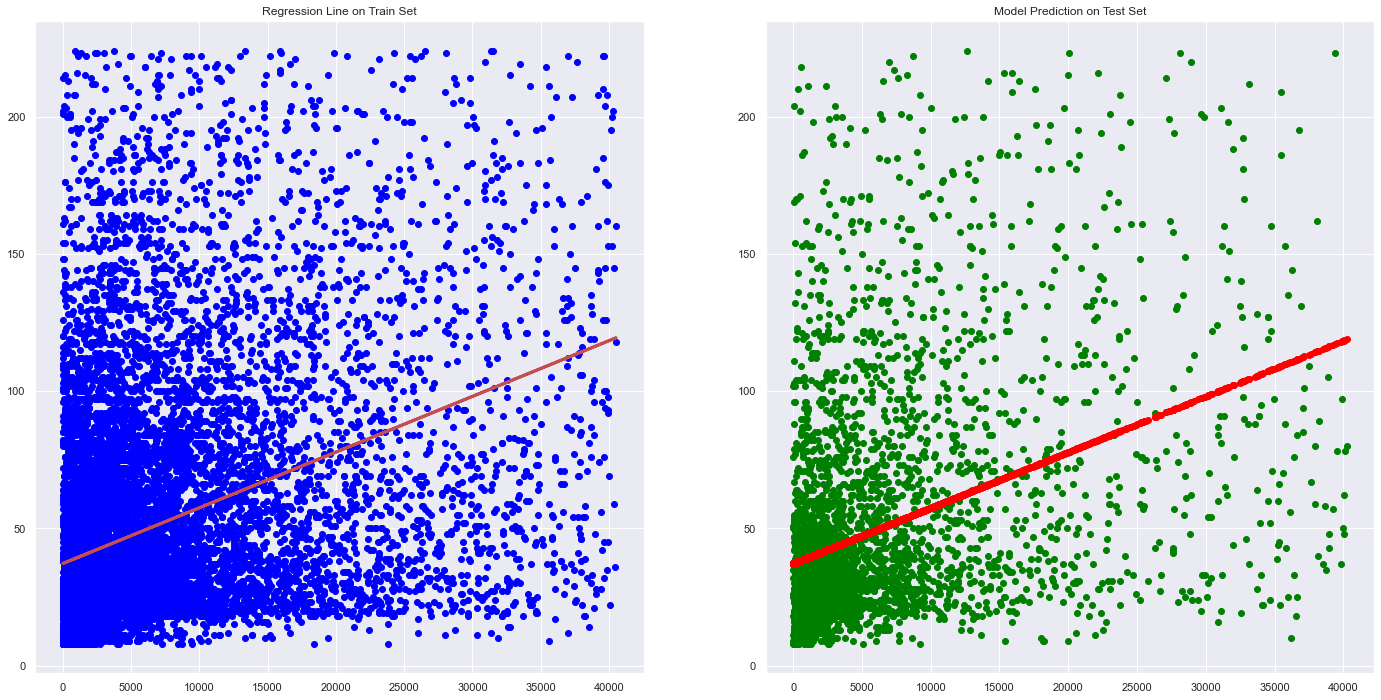

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.14773651276639532
Mean Squared Error (MSE) 	: 1495.1068223640848

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.15141307181751917
Mean Squared Error (MSE) 	: 1551.9475405850806



In [22]:
univariateLinearRegression(Xvar = "follow_count", yvar = "viewer_count", df = targetData)

### Conclusion

We are unable to draw any meaningful conclusion from the linear regression as we can see in the graphs above. We will try to do it with cleaned data with total views instead

In [23]:
targetData2 = twitchdata_clean[['viewer_count', 'total_views']].copy()
targetData2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22498 entries, 0 to 22497
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   viewer_count  22498 non-null  int64
 1   total_views   22498 non-null  int64
dtypes: int64(2)
memory usage: 351.7 KB


In [24]:
# Calculate the quartiles
Q1 = targetData2.quantile(0.25)
Q3 = targetData2.quantile(0.75)

# Rule to identify outliers
rule = ((targetData2 < (Q1 - 1.5 * (Q3 - Q1))) | (targetData2 > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

viewer_count    3002
total_views     3731
dtype: int64

In [25]:
# Calculate the quartiles
Q1 = targetData2.quantile(0.25)
Q3 = targetData2.quantile(0.75)

# Rule toaidentify outliers
rule = ((targetData2 < (Q1 - 1.5 * (Q3 - Q1))) | (targetData2 > (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule

,viewer_count,total_views
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
22493,False,False
22494,False,False
22495,False,False
22496,False,False


In [26]:
# Find the rows where ANY column is True
outliers2 = rule.any(axis = 1)   # axis 0 is row, 1 is column

# How many points are outliers for the two variables combined?
print(outliers2.value_counts())

False    17787
True      4711
dtype: int64


In [27]:
# Which row indices correspond to outliers in the dataframe?
outlierindices2 = outliers2.index[outliers2 == True]
outlierindices2

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            22245, 22259, 22263, 22274, 22305, 22315, 22316, 22357, 22417,
            22474],
           dtype='int64', length=4711)

In [28]:
# Remove the outliers based on the row indices obtained above
targetData2.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices2, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
targetData2 = targetData2.reset_index(drop = True)
print(targetData2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17787 entries, 0 to 17786
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   viewer_count  17787 non-null  int64
 1   total_views   17787 non-null  int64
dtypes: int64(2)
memory usage: 278.0 KB
None


Intercept 	: b =  [39.45481899]
Coefficients 	: a =  [[6.10765911e-05]]


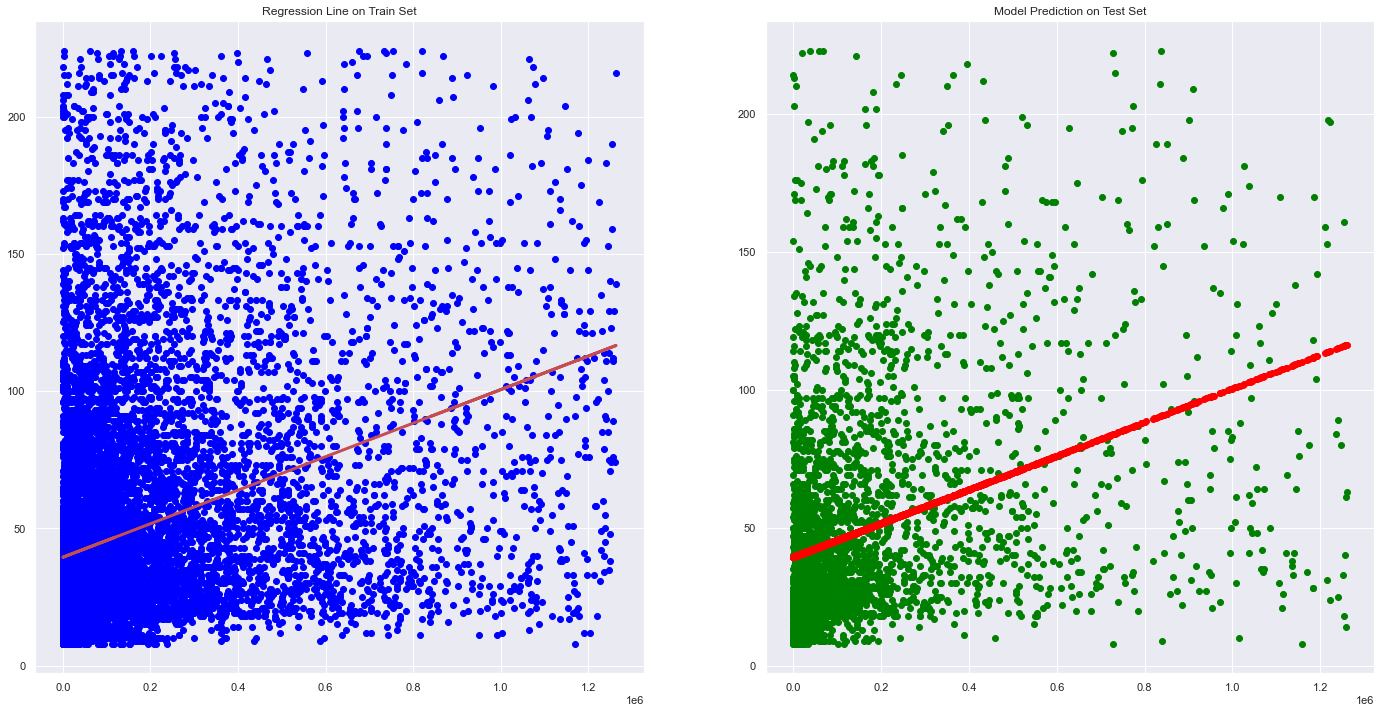

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.11781891467801009
Mean Squared Error (MSE) 	: 1509.7389440430472

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.13276206574810745
Mean Squared Error (MSE) 	: 1404.7185584844117



In [29]:
univariateLinearRegression(Xvar = "total_views", yvar = "viewer_count", df = targetData2)

### Conclusion
Although our initial assumption for both follow_count and total_views to be strongly related with active viewer count, after doing linear regression, we find that our assumptions are wrong.

## Multi-variate Linear Regression
We will attempt one final time to find meaningful data by combining follow_count and total_views into a multi-variate linear regression

In [30]:
multiData = twitchdata_clean[['viewer_count','follow_count','total_views']].copy()
multiData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22498 entries, 0 to 22497
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   viewer_count  22498 non-null  int64
 1   follow_count  22498 non-null  int64
 2   total_views   22498 non-null  int64
dtypes: int64(3)
memory usage: 527.4 KB


In [31]:
# Calculate the quartiles
Q1 = multiData.quantile(0.25)
Q3 = multiData.quantile(0.75)

# Rule to identify outliers
mRule = ((multiData < (Q1 - 1.5 * (Q3 - Q1))) | (multiData > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
mRule.sum()

viewer_count    3002
follow_count    3237
total_views     3731
dtype: int64

In [32]:
# Calculate the quartiles
Q1 = multiData.quantile(0.25)
Q3 = multiData.quantile(0.75)

# Rule to identify outliers
mRule = ((multiData < (Q1 - 1.5 * (Q3 - Q1))) | (multiData > (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
mRule

,viewer_count,follow_count,total_views
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
22493,False,False,False
22494,False,False,False
22495,False,False,False
22496,False,False,False


In [33]:
# Find the rows where ANY column is True
mOutliers = mRule.any(axis = 1)   # axis 0 is row, 1 is column

# Check the outliers -- it's a boolean Series
mOutliers

0         True
1         True
2         True
3         True
4         True
         ...  
22493    False
22494    False
22495    False
22496    False
22497    False
Length: 22498, dtype: bool

In [34]:
# Which row indices correspond to outliers in the dataframe?
mOutlierindices = mOutliers.index[mOutliers == True]
mOutlierindices

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            22263, 22274, 22305, 22315, 22316, 22357, 22392, 22417, 22453,
            22474],
           dtype='int64', length=5120)

In [35]:
# Remove the outliers based on the row indices obtained above
multiData.drop(axis = 0,               # 0 drops row 1 drops column
                index = mOutlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
multiData.info()
print(multiData)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17378 entries, 425 to 22497
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   viewer_count  17378 non-null  int64
 1   follow_count  17378 non-null  int64
 2   total_views   17378 non-null  int64
dtypes: int64(3)
memory usage: 543.1 KB
       viewer_count  follow_count  total_views
425             218           567         1514
427             218         10467       253554
428             218          6042       396508
431             217          7361       473296
434             216         15361       136025
...             ...           ...          ...
22493            18          3409       231596
22494            18          2339        36948
22495            18            16           83
22496            18          1944        29721
22497            17          1456        33105

[17378 rows x 3 columns]


Intercept of Regression 	: b =  [35.84]
Coefficients of Regression 	: a =  [[1.43e-03 3.00e-05]]

     Predictors  Coefficients
0  follow_count      0.001425
1   total_views      0.000030



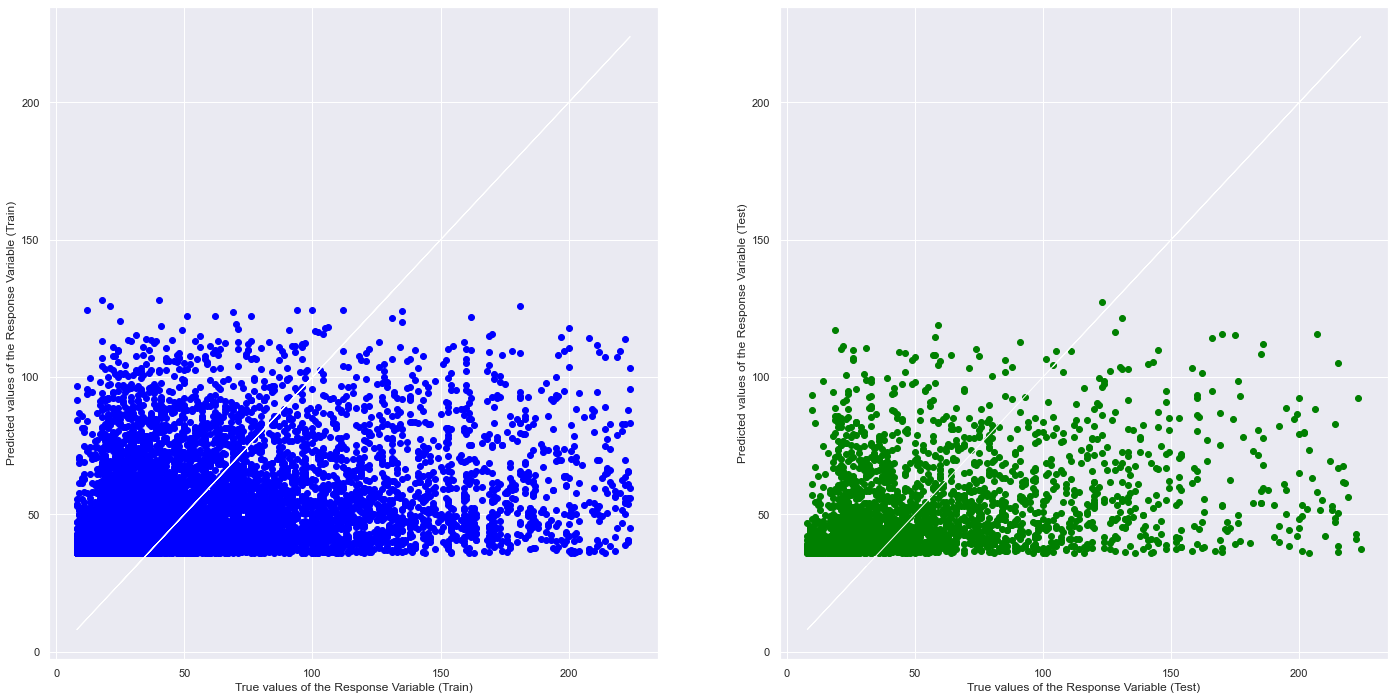

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.13999677752096462
Mean Squared Error (MSE) 	: 1393.1601122944378

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.15410947628421268
Mean Squared Error (MSE) 	: 1404.1273393429772



In [64]:
#Multi-variate LR

y = pd.DataFrame(multiData['viewer_count'])
X = pd.DataFrame(multiData[['follow_count','total_views']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

### Conclusion
Even with multi-variate linear regression with our numeric predictors, we are unable to find any meaningful links between the images we have seen other than that the explained variance is low.

# Using Decision Tree

### Chaging the numerical problem into a classification problem by assigning categories to active stream count (Low, Mid, High) by looking at the IQR range

Low < Q1     
Q1 < MED < Q3    
Q3 < HIGH    

In [37]:
expData = twitchdata_clean.copy()

Q1 = expData['viewer_count'].quantile(0.25)
Q3 = expData['viewer_count'].quantile(0.75)

conditions = [(expData['viewer_count'] < Q1), (expData['viewer_count'] >= Q1) & (expData['viewer_count'] <= Q3), (expData['viewer_count'] > Q3)]
values = ['Low','Mid','High']

expData['viewer_count_cat'] = np.select(conditions,values)

print(expData['viewer_count_cat'])

0        High
1        High
2        High
3        High
4        High
         ... 
22493     Low
22494     Low
22495     Low
22496     Low
22497     Low
Name: viewer_count_cat, Length: 22498, dtype: object


In [38]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
expData_cat = expData[['is_mature','game_name','language']]
ohe.fit(expData_cat)
expData_cat_ohe = pd.DataFrame(ohe.transform(expData_cat).toarray(), 
                                  columns=ohe.get_feature_names(expData_cat.columns))

# Check the encoded variables
expData_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22498 entries, 0 to 22497
Columns: 1437 entries, is_mature_False to language_zh-hk
dtypes: float64(1437)
memory usage: 246.7 MB


In [39]:
expData_num = expData[['total_views','follow_count']]
expData_res = expData['viewer_count_cat']
expData_ohe = pd.concat([expData_num,expData_res,expData_cat_ohe], 
                           sort = False, axis = 1).reindex(index=expData_num.index)
expData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22498 entries, 0 to 22497
Columns: 1440 entries, total_views to language_zh-hk
dtypes: float64(1437), int64(2), object(1)
memory usage: 247.2+ MB


Train Set : (15748, 1439) (15748, 1)
Test Set  : (6750, 1439) (6750, 1)


[Text(2790.0, 4892.4, 'follow_count <= 15179.5\ngini = 0.618\nsamples = 15748\nvalue = [3902, 3755, 8091]\nclass = High'),
 Text(1395.0, 3805.2, 'follow_count <= 943.5\ngini = 0.552\nsamples = 11555\nvalue = [1231, 3582, 6742]\nclass = High'),
 Text(697.5, 2718.0, 'follow_count <= 379.5\ngini = 0.53\nsamples = 3098\nvalue = [119, 1655, 1324]\nclass = Mid'),
 Text(348.75, 1630.7999999999997, 'game_name_Invalid <= 0.5\ngini = 0.515\nsamples = 1405\nvalue = [65, 835, 505]\nclass = Mid'),
 Text(174.375, 543.5999999999995, 'gini = 0.497\nsamples = 1287\nvalue = [48, 797, 442]\nclass = Mid'),
 Text(523.125, 543.5999999999995, 'gini = 0.59\nsamples = 118\nvalue = [17, 38, 63]\nclass = High'),
 Text(1046.25, 1630.7999999999997, 'is_mature_True <= 0.5\ngini = 0.53\nsamples = 1693\nvalue = [54, 820, 819]\nclass = Mid'),
 Text(871.875, 543.5999999999995, 'gini = 0.535\nsamples = 983\nvalue = [41, 425, 517]\nclass = High'),
 Text(1220.625, 543.5999999999995, 'gini = 0.509\nsamples = 710\nvalue = [

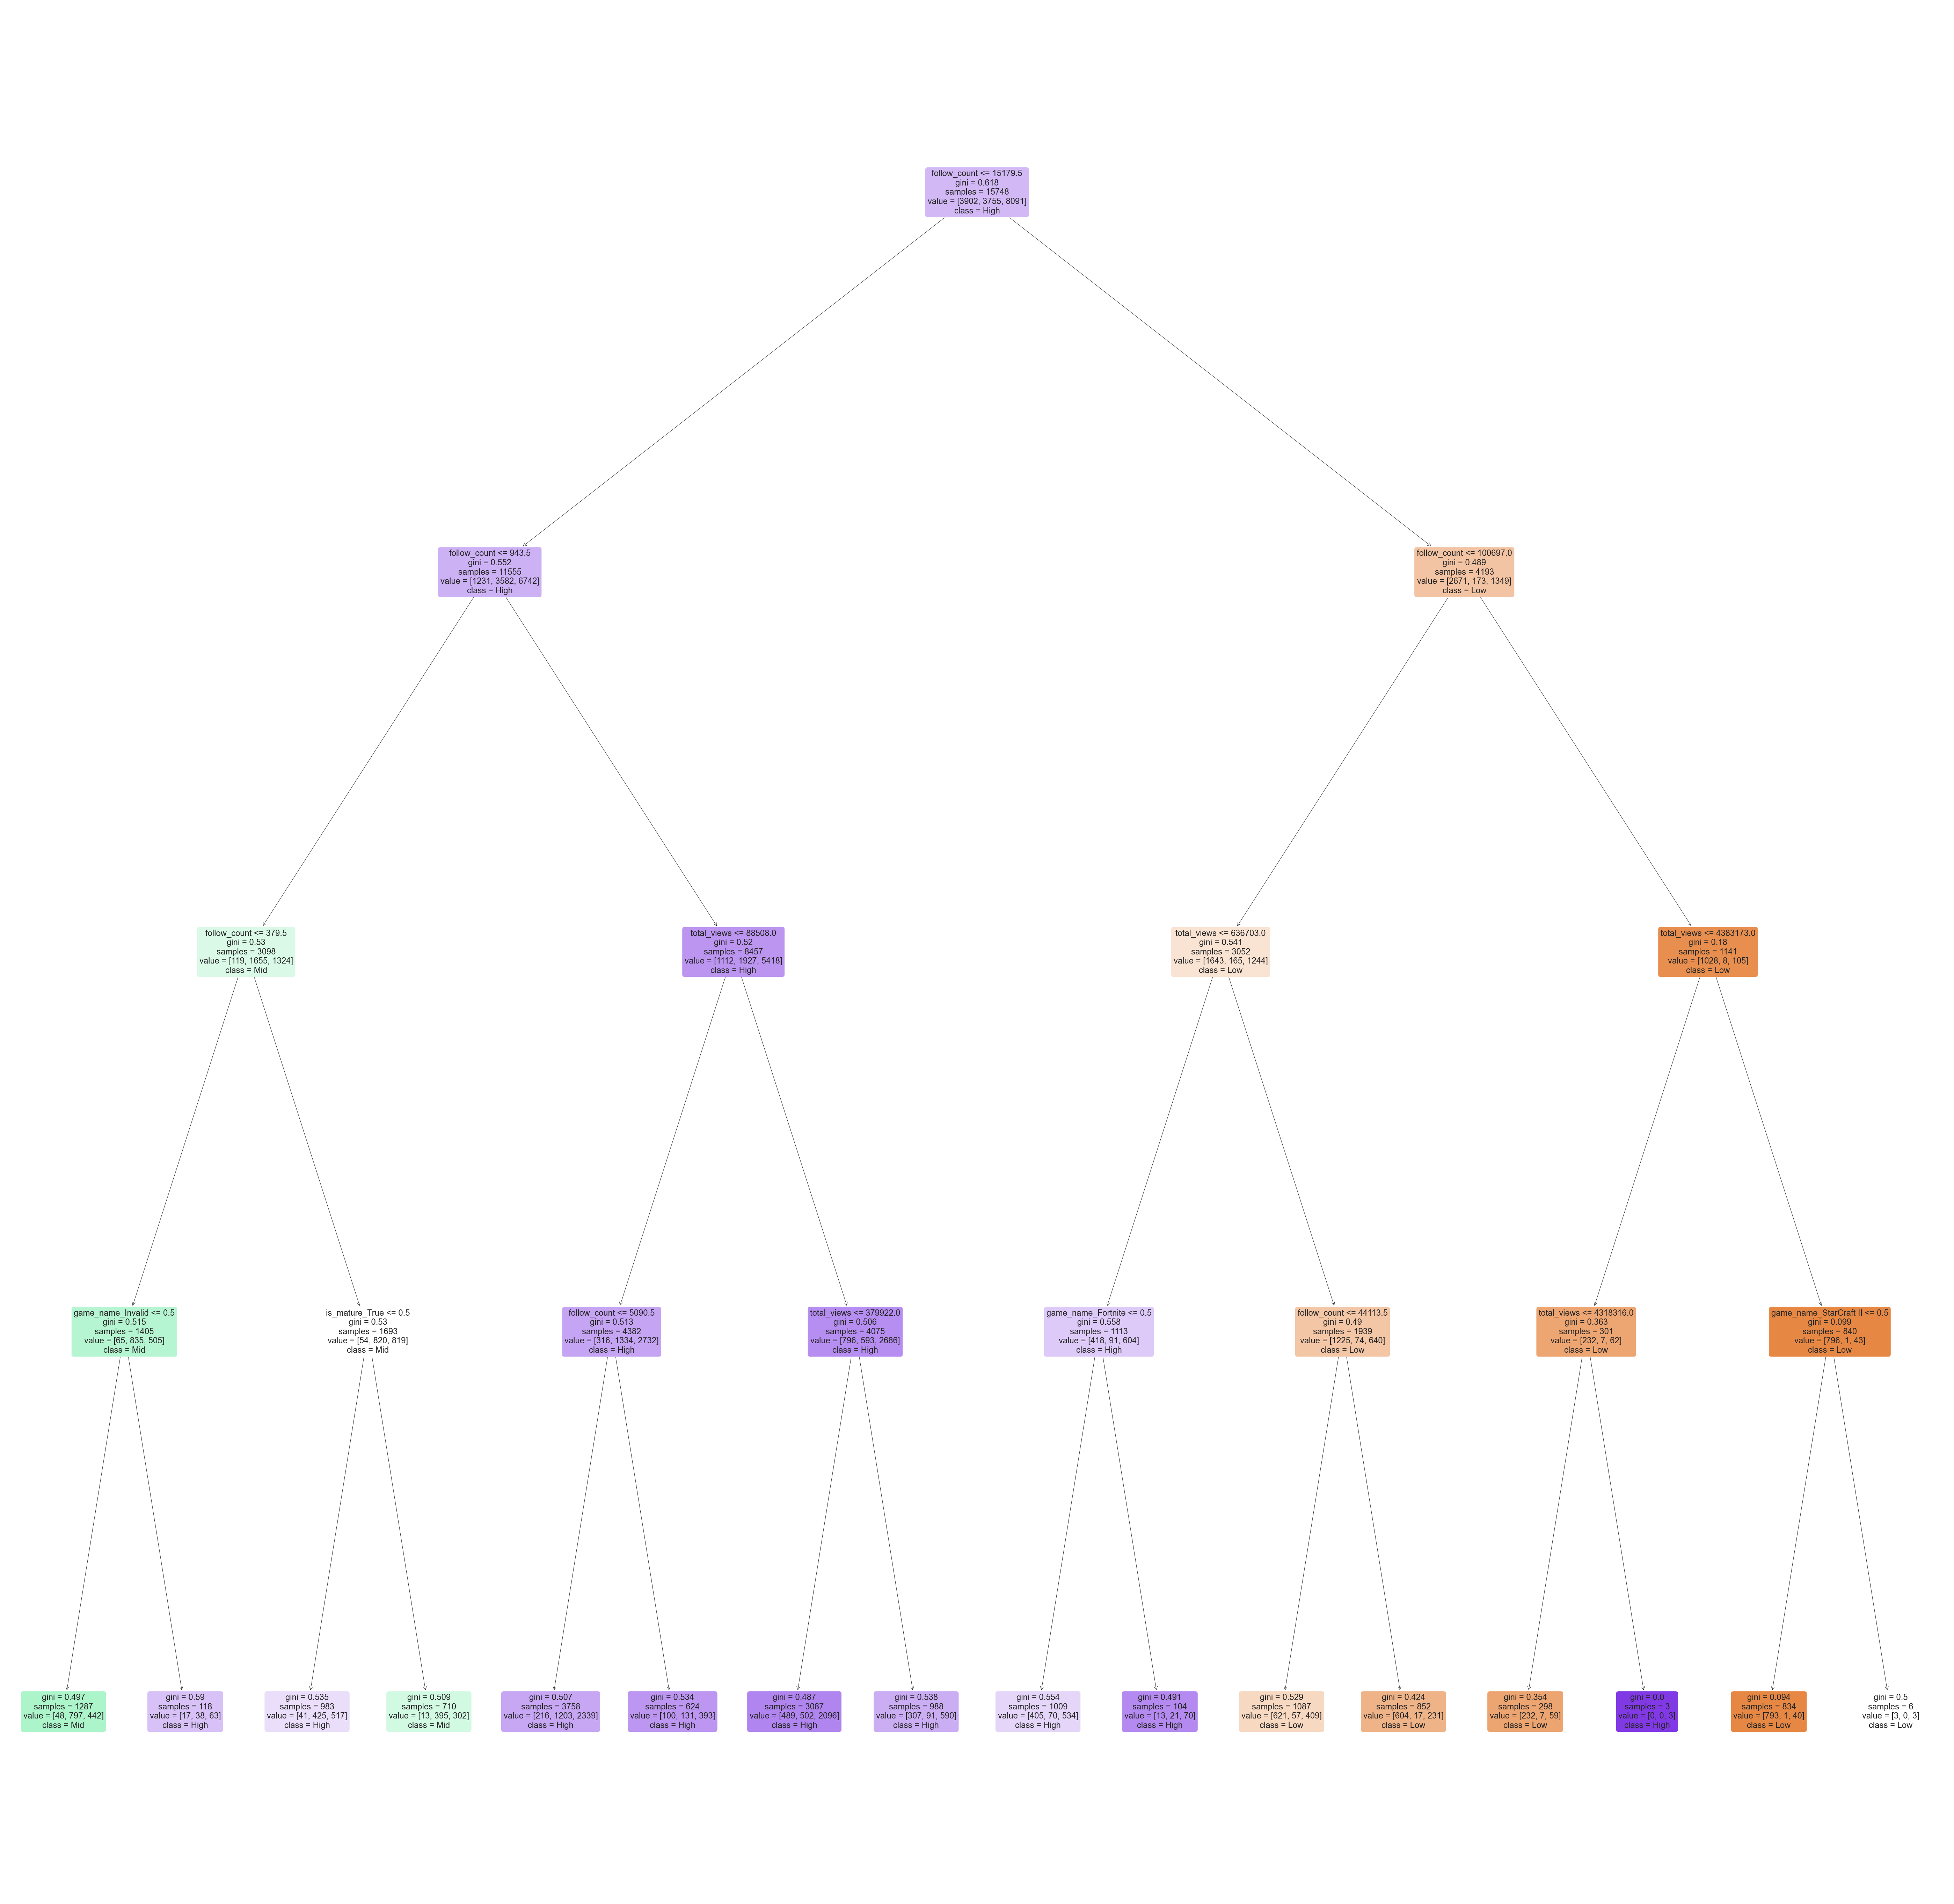

In [73]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(expData_ohe['viewer_count_cat'])
X = pd.DataFrame(expData_ohe.drop('viewer_count_cat', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(100,100))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Low","Mid","High"])


Train Data
Accuracy for depth = 30  :	 0.6381762763525527

Confusion matrix, without normalization
[[1192 2481   82]
 [ 744 6605  742]
 [  61 1588 2253]]


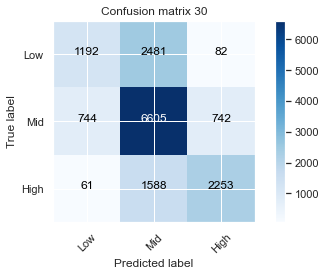

In [74]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.axes
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    

dectreepred = dectree.predict(X_train)

print("Train Data")
print("Accuracy for depth = 30  :\t", dectree.score(X_train, y_train))
print()
    
dtTrain = confusion_matrix(y_train, dectreepred,labels = ['Low','Mid','High'])


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(dtTrain, classes=['Low', 'Mid', 'High'],
                      title='Confusion matrix for DecTree')

## Conclusion

We find that the accuracy of the Decision Tree is not as high as we expected which may be due to the immense amount of categorical predictors that is present in our data set. Hence, we need to use a variant of decision tree which is random forest in order to get a better picture.

# Random forest

After testing around with different values in the random forest function, we found that having a deeper depth rather than more trees increases the accuracy more as we can see below.

Train Data
Accuracy for depth = 30  :	 0.7047879095758192

Confusion matrix, without normalization
[[ 920 2777   58]
 [  33 7678  380]
 [   8 1393 2501]]


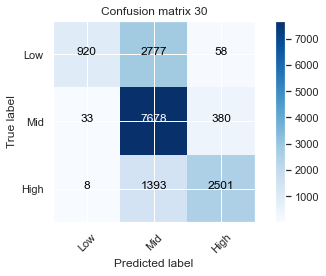

In [75]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest30 = RandomForestClassifier(n_estimators = 50,  # n_estimators denote number of trees
                                 max_depth = 30) 
rforest40 = RandomForestClassifier(n_estimators = 50,  # n_estimators denote number of trees
                                 max_depth = 40) 
rforest50 = RandomForestClassifier(n_estimators = 50,  # n_estimators denote number of trees
                                 max_depth = 50)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest30.fit(X_train, y_train.viewer_count_cat.ravel())
rforest40.fit(X_train, y_train.viewer_count_cat.ravel())
rforest50.fit(X_train, y_train.viewer_count_cat.ravel())

y_30_train_pred = rforest30.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy for depth = 30  :\t", rforest30.score(X_train, y_train))
print()
    
cm30Train = confusion_matrix(y_train, y_30_train_pred,labels = ['Low','Mid','High'])


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm30Train, classes=['Low', 'Mid', 'High'],
                      title='Confusion matrix 30')

Train Data
Accuracy for depth = 40  :	 0.7480949961899924

Confusion matrix, without normalization
[[1440 2252   63]
 [  82 7680  329]
 [  17 1224 2661]]


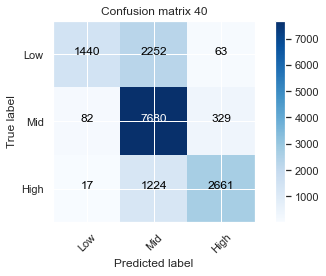

In [76]:
y_40_train_pred = rforest40.predict(X_train)
print("Train Data")
print("Accuracy for depth = 40  :\t", rforest40.score(X_train, y_train))
print()
plt.figure()
cm40Train = confusion_matrix(y_train, y_40_train_pred,labels = ['Low','Mid','High'])
plot_confusion_matrix(cm40Train, classes=['Low', 'Mid', 'High'],
                      title='Confusion matrix 40')

In [116]:
y_50_train_pred = rforest50.predict(X_train)
print("Train Data")
print("Accuracy for depth = 50  :\t", rforest50.score(X_train, y_train))
print()
plt.figure()
cm50Train = confusion_matrix(y_train, y_50_train_pred,labels = ['Low','Mid','High'])
plot_confusion_matrix(cm50Train, classes=['Low', 'Mid', 'High'],
                      title='Confusion matrix 30')

ValueError: X has 1437 features, but DecisionTreeClassifier is expecting 1439 features as input.

In [112]:
importances = rforest50.feature_importances_
feature_names = [i for i in X.columns]
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in rforest50.estimators_], axis=0)
df = pd.DataFrame({"Feature Names":feature_names,
      "Standard Dev" : std});
df = df.sort_values(by = ["Standard Dev"],ascending = False)
pd.set_option('display.max_rows', 50)
df.head(50)

,Feature Names,Standard Dev
0,total_views,0.104197
1,follow_count,0.104107
3,is_mature_True,0.005243
2,is_mature_False,0.005038
1427,language_pt,0.002608
1412,language_en,0.002428
607,game_name_Just Chatting,0.001947
1413,language_es,0.001764
449,game_name_Fortnite,0.001690
592,game_name_Invalid,0.001671


After using the random forest algorithm with every predictor that we have, we find that the numeric predictors have the highest MDI, which means that they are the most important feature that can be used to predict viewer_count. Since we have tried Linear Regression with our numeric predictors before, we want to try and explore the Random Forest Algorithm without the numerical predictors

# Random Forest without Numeric Predictors

In [113]:
# OneHotEncoding of categorical predictors (not the response)
expData_ohe_noNum = pd.concat([expData_res,expData_cat_ohe], 
                           sort = False, axis = 1).reindex(index=expData_num.index)
expData_ohe_noNum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22498 entries, 0 to 22497
Columns: 1438 entries, viewer_count_cat to language_zh-hk
dtypes: float64(1437), object(1)
memory usage: 246.8+ MB


In [114]:
# Extract Response and Predictors
y = pd.DataFrame(expData_ohe_noNum['viewer_count_cat'])
X = pd.DataFrame(expData_ohe_noNum.drop('viewer_count_cat', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (15748, 1437) (15748, 1)
Test Set  : (6750, 1437) (6750, 1)


In [115]:
# Create the Random Forest object
rforest30noNum = RandomForestClassifier(n_estimators = 50,  # n_estimators denote number of trees
                                 max_depth = 30) 
rforest40noNum = RandomForestClassifier(n_estimators = 50,  # n_estimators denote number of trees
                                 max_depth = 40) 
rforest50noNum = RandomForestClassifier(n_estimators = 50,  # n_estimators denote number of trees
                                 max_depth = 50)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest30noNum.fit(X_train, y_train.viewer_count_cat.ravel())
rforest40noNum.fit(X_train, y_train.viewer_count_cat.ravel())
rforest50noNum.fit(X_train, y_train.viewer_count_cat.ravel())

RandomForestClassifier(max_depth=50, n_estimators=50)

Train Data
Accuracy for depth = 30  :	 0.5258445516891034

Confusion matrix, without normalization
[[  24 3660    9]
 [   1 8168    4]
 [   0 3793   89]]


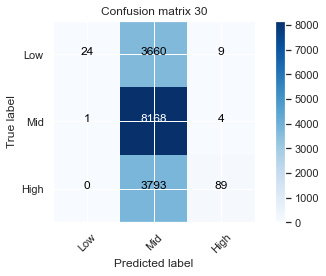

In [117]:
# Depth 30
y_30_train_pred = rforest30noNum.predict(X_train)
# Print the Classification Accuracy
print("Train Data")
print("Accuracy for depth = 30  :\t", rforest30noNum.score(X_train, y_train))
print()
    
cm30Train = confusion_matrix(y_train, y_30_train_pred,labels = ['Low','Mid','High'])

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm30Train, classes=['Low', 'Mid', 'High'],
                      title='Confusion matrix 30')

Train Data
Accuracy for depth = 40  :	 0.5372110744221489

Confusion matrix, without normalization
[[ 106 3563   24]
 [  10 8104   59]
 [  11 3621  250]]


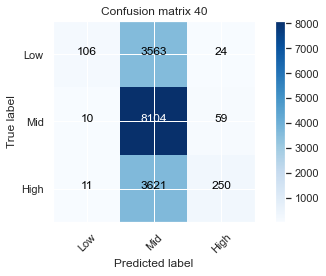

In [118]:
# Depth 40
y_40_train_pred = rforest40noNum.predict(X_train)
# Print the Classification Accuracy
print("Train Data")
print("Accuracy for depth = 40  :\t", rforest40noNum.score(X_train, y_train))
print()
plt.figure()
cm40Train = confusion_matrix(y_train, y_40_train_pred,labels = ['Low','Mid','High'])
plot_confusion_matrix(cm40Train, classes=['Low', 'Mid', 'High'],
                      title='Confusion matrix 40')

Train Data
Accuracy for depth = 50  :	 0.5414655829311659

Confusion matrix, without normalization
[[ 153 3508   32]
 [  20 8096   57]
 [  15 3589  278]]


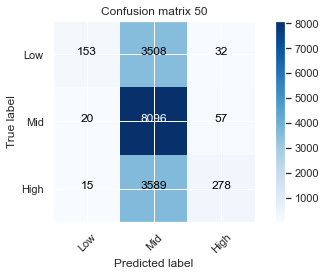

In [119]:
# Depth 50
y_50_train_pred = rforest50noNum.predict(X_train)
# Print the Classification Accuracy
print("Train Data")
print("Accuracy for depth = 50  :\t", rforest50noNum.score(X_train, y_train))
print()
plt.figure()
cm50Train = confusion_matrix(y_train, y_50_train_pred,labels = ['Low','Mid','High'])
plot_confusion_matrix(cm50Train, classes=['Low', 'Mid', 'High'],
                      title='Confusion matrix 50')

In [121]:
importances = rforest50noNum.feature_importances_
feature_names = [i for i in X.columns]
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in rforest50noNum.estimators_], axis=0)
df = pd.DataFrame({"Feature Names":feature_names,
      "Standard Dev" : std});
df = df.sort_values(by = ["Standard Dev"],ascending = False)
pd.set_option('display.max_rows', 50)
df.head(50)

,Feature Names,Standard Dev
1,is_mature_True,0.033621
0,is_mature_False,0.026893
1410,language_en,0.014178
605,game_name_Just Chatting,0.010882
1408,language_de,0.009160
1425,language_pt,0.008964
1427,language_ru,0.007992
1298,game_name_VALORANT,0.007685
1413,language_fr,0.007099
1411,language_es,0.006733
